# Problem Definition

In [107]:
# Importing Dictionaries..

import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell        ## To display multiple outputs
InteractiveShell.ast_node_interactivity = "all"
            
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt                                         
%matplotlib inline

import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

## Data Pre-Processing Packages
from scipy.stats import chi2_contingency
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Data Analysis

In [41]:
data = pd.read_csv('HRA')
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [42]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [43]:
data.shape
#Checking the shape of the dataset..

(1470, 35)

In [44]:
data.info()
#Checking the information in types of data..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [45]:
data.isnull().sum()
#Checking the null values present in dataset..

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [46]:
# Information about numerical variables
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [50]:
data['Attrition'].value_counts()
#to find the 

No     1233
Yes     237
Name: Attrition, dtype: int64

In [51]:
data['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [53]:
data['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [54]:
data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
data['OverTime'] = data['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Over18'] = data['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

In [55]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# EDA

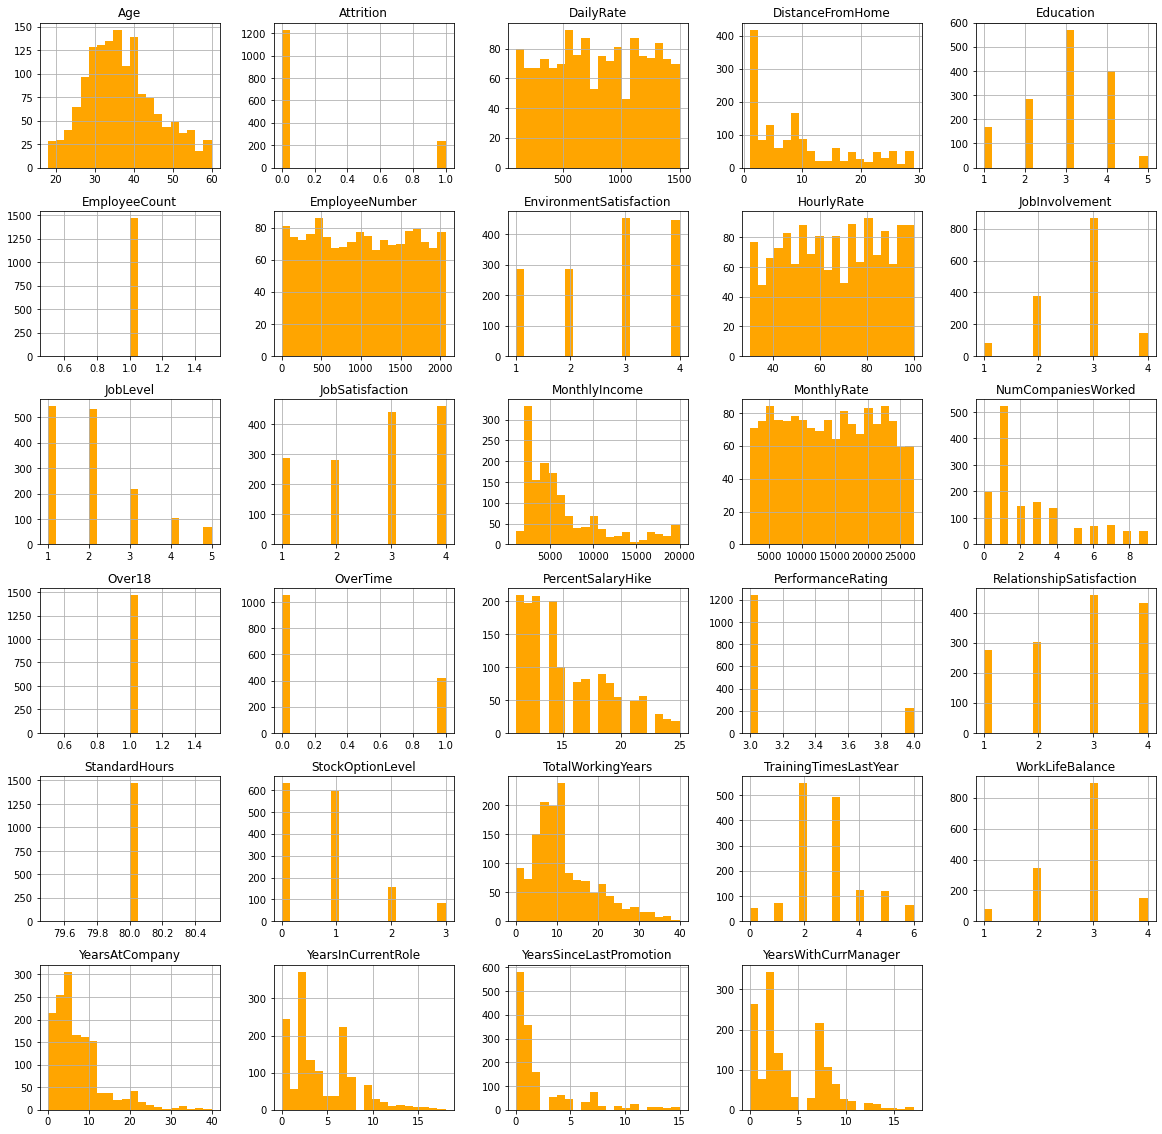

In [60]:
# Plotting a histogram to visualize the features...

data.hist(bins = 20, figsize = (20,20), color = 'orange');

In [61]:
data.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)
#Sine these datas not vary from each other we can drop these columns..

In [62]:
data.shape

(1470, 31)

In [63]:
# Let's see how many employees left the company! 
Yes_data = data[data['Attrition'] == 1]
No_data = data[data['Attrition'] == 0]

In [65]:
print("Total =", len(data))
print("Number of employees who left the company:", len(Yes_data))
print("Number of employees who did not leave the company (stayed) =", len(No_data))


Total = 1470
Number of employees who left the company: 237
Number of employees who did not leave the company (stayed) = 1233


In [66]:
Yes_data.describe()
No_data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


<Figure size 2160x2736 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Heatmap to find corelation')

<function matplotlib.pyplot.show(close=None, block=None)>

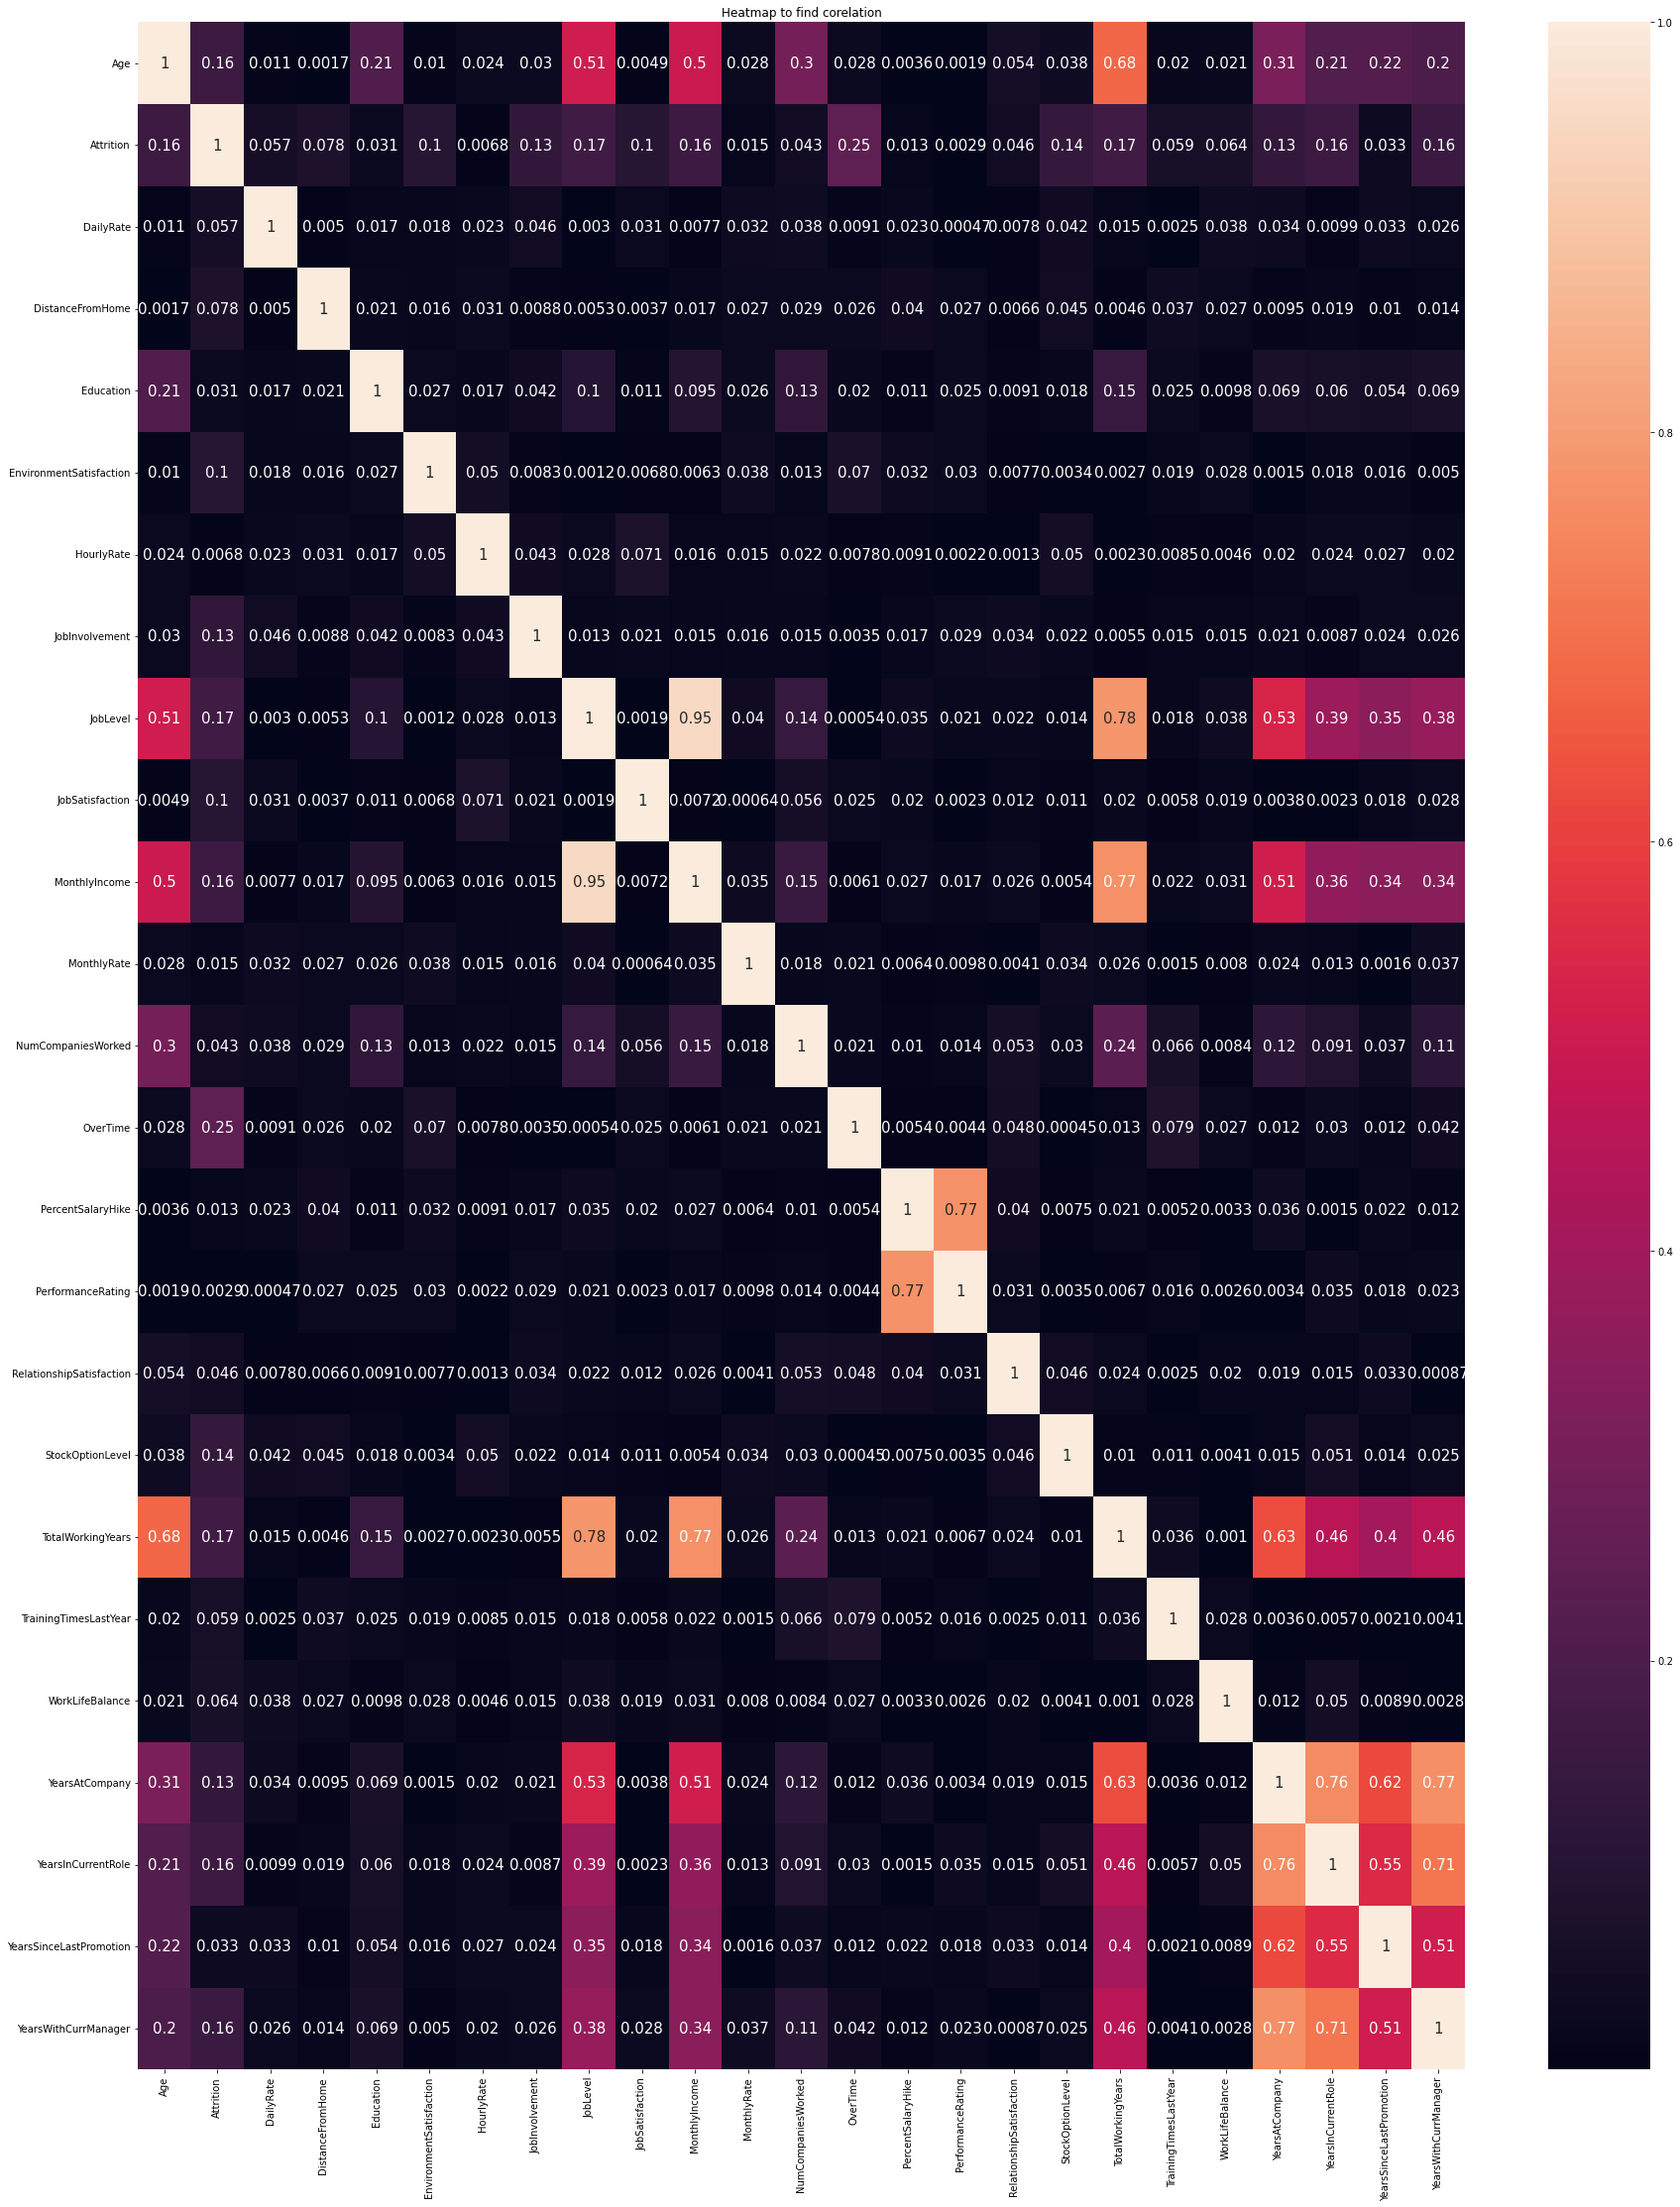

In [74]:
corr=data.corr().abs()
plt.figure(figsize=(30,38))
sns.heatmap(corr,annot=True,annot_kws={'size':15})
plt.title("Heatmap to find corelation")
plt.show

In [75]:
data.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='JobRole', ylabel='count'>

Text(0.5, 1.0, 'Position of Attrition')

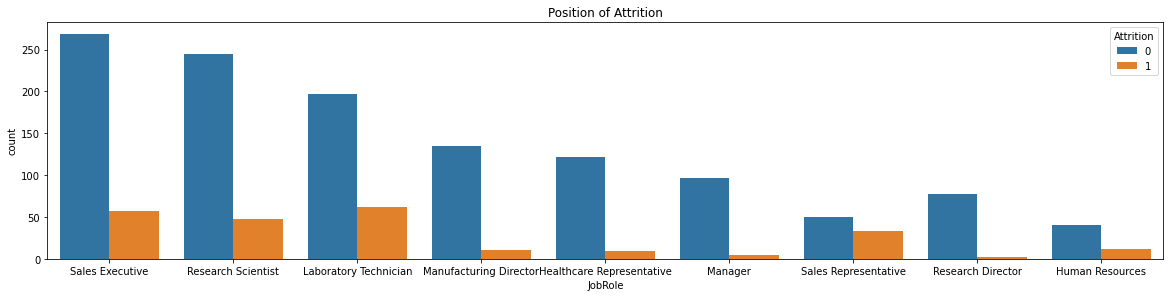

In [71]:
plt.figure(figsize=[20,20])

plt.subplot(411)

sns.countplot(x = 'JobRole', hue = 'Attrition', data = data)
plt.title("Position of Attrition")

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

Text(0.5, 1.0, 'MonthlyIncome Vs JobRole')

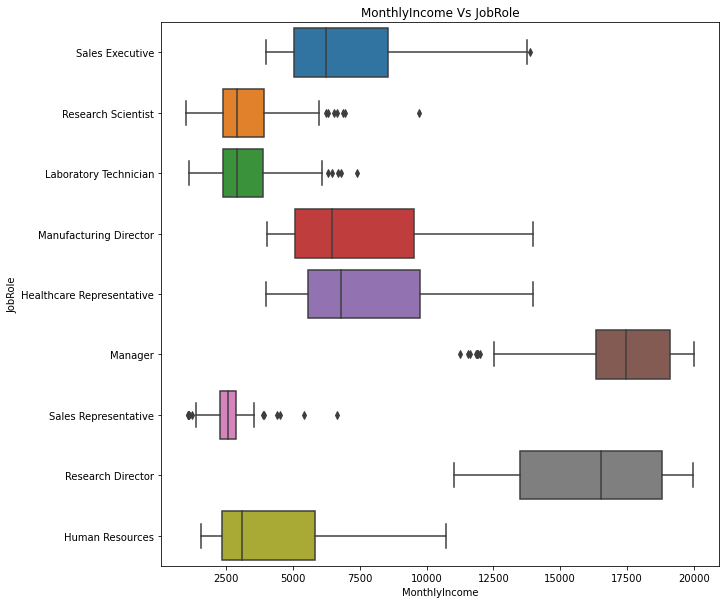

In [72]:
# Let's see the Monthly Income vs. Job Role

plt.figure(figsize=(10, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = data);
plt.title("MonthlyIncome Vs JobRole")

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

Text(0.5, 1.0, 'MonthlyIncome Vs JobRole')

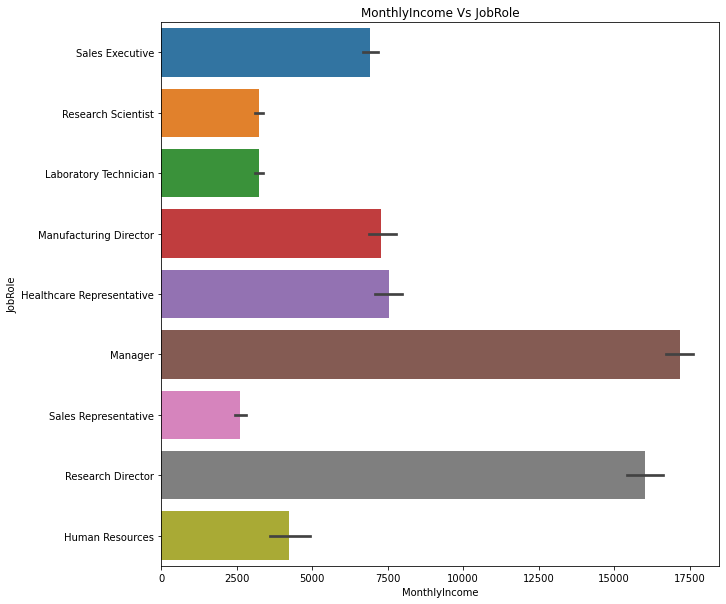

In [73]:
plt.figure(figsize=(10, 10))
sns.barplot(x = 'MonthlyIncome', y = 'JobRole', data = data);
plt.title("MonthlyIncome Vs JobRole")

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

Text(0.5, 1.0, 'Marital Status Vs Attrition')

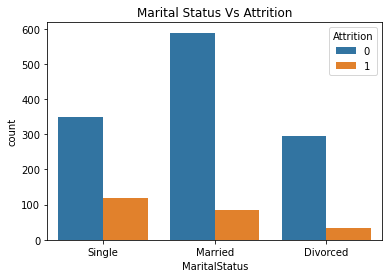

In [81]:
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = data)
plt.title("Marital Status Vs Attrition")

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

Text(0.5, 1.0, 'Job involvement Vs Attrition')

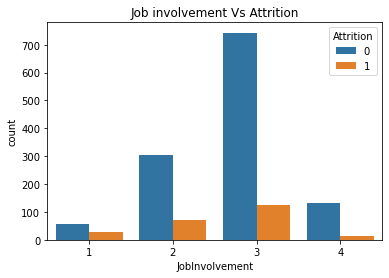

In [83]:
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = data)
plt.title("Job involvement Vs Attrition")

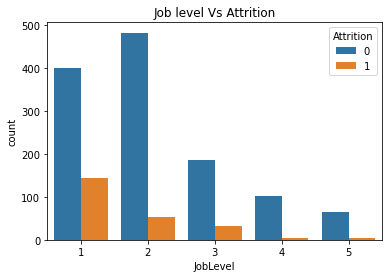

In [84]:
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = data)
plt.title("Job level Vs Attrition");

# DATA - Pre-processing 

# Data Cleaning

In [87]:
data.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                     int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

# Encoding :

In [88]:
df = data[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
df

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [89]:
df.sample(10)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
560,Travel_Rarely,Research & Development,Life Sciences,Female,Manufacturing Director,Divorced
767,Travel_Rarely,Research & Development,Other,Female,Healthcare Representative,Single
1305,Travel_Rarely,Research & Development,Medical,Female,Research Scientist,Married
971,Travel_Rarely,Research & Development,Technical Degree,Female,Manufacturing Director,Single
1430,Travel_Rarely,Research & Development,Medical,Female,Research Director,Married
1438,Travel_Frequently,Sales,Marketing,Male,Sales Representative,Married
666,Travel_Rarely,Research & Development,Life Sciences,Female,Manufacturing Director,Married
1042,Non-Travel,Research & Development,Life Sciences,Male,Laboratory Technician,Single
245,Travel_Frequently,Research & Development,Medical,Male,Research Director,Divorced
1159,Travel_Frequently,Research & Development,Medical,Female,Manufacturing Director,Single


In [91]:
df['EducationField'].unique()
#To check the unique values...

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [92]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [93]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [94]:
#Using OneHotEncoder for encoding the categorical columns..
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
df = onehotencoder.fit_transform(df).toarray()

In [95]:
df.shape

(1470, 26)

In [97]:
# Converting into dataframe
df = pd.DataFrame(df)
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [98]:
# Separating the numerical data
df1 = data[['Age', 'DailyRate', 'DistanceFromHome','Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears'	,'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']]
df1

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [99]:
df2=pd.concat([df,df1],axis=1)

In [100]:
df2.head(10)

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,2,2,7,7,3,6
6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,4,1,3,12,3,2,1,0,0,0
7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,1,2,3,1,0,0,0
8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,0,10,2,3,9,7,1,8
9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,2,2,17,3,2,7,7,7,7


# Minmax Scaler

In [104]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df2)
X
#To convert the data between 0 and 1...

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [103]:
Y=data['Attrition']

# Train and test:

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

# Building Machine Learning Models

# LOGISTIC REGRESSION:

In [108]:
from sklearn.linear_model import LogisticRegression

In [137]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [109]:
log_reg=LogisticRegression()

In [110]:
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [111]:
Y_pred=log_reg.predict(X_test)
Y_pred
#Making Predictions..

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [112]:
#ACCURACY Score
accuracy=accuracy_score(Y_test,Y_pred)
accuracy

0.904891304347826

# Confusion Matrix

In [114]:
from sklearn.metrics import confusion_matrix, classification_report

In [115]:
conf_mat=confusion_matrix(Y_test,Y_pred)
conf_mat

array([[307,   4],
       [ 31,  26]], dtype=int64)

# ClassificationReport

In [116]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       311
           1       0.87      0.46      0.60        57

    accuracy                           0.90       368
   macro avg       0.89      0.72      0.77       368
weighted avg       0.90      0.90      0.89       368



# thresholds to find roc curve

In [138]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred) 
print('Threshold=',thresholds) 
print('true Positive Rate=',tpr) 
print('false positive Rate=',fpr)

Threshold= [2 1 0]
true Positive Rate= [0.         0.45614035 1.        ]
false positive Rate= [0.         0.01286174 1.        ]


# ROC curve

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'true Positive rate')

Text(0.5, 1.0, 'Receiver operating charecteristics ROC curve')

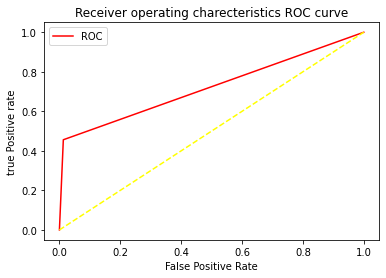

In [139]:
plt.plot(fpr,tpr,color='red',label='ROC')
plt.plot([0,1],[0,1],color='yellow',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('true Positive rate')
plt.title('Receiver operating charecteristics ROC curve')
plt.legend()
plt.show()

# AUC_SCORE

In [141]:
auc_score=roc_auc_score(Y_pred,Y_test)
auc_score

0.8874753451676528

# Random Forest Classifier

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
Ran_For=RandomForestClassifier()

In [119]:
Ran_For.fit(X_train,Y_train)

RandomForestClassifier()

In [120]:
Y1_pred=Ran_For.predict(X_test)
#Checking the predictions

In [122]:
#ACCURACY Score
accuracy=accuracy_score(Y1_pred,Y_test)
accuracy

0.8614130434782609

In [125]:
conf_mat=confusion_matrix(Y1_pred,Y_test)
conf_mat

array([[307,  47],
       [  4,  10]], dtype=int64)

# # ClassificationReport

In [126]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       311
           1       0.87      0.46      0.60        57

    accuracy                           0.90       368
   macro avg       0.89      0.72      0.77       368
weighted avg       0.90      0.90      0.89       368



# thresholds to find roc curve

In [143]:
fpr,tpr,thresholds=roc_curve(Y_test,Y1_pred) 
print('Threshold=',thresholds) 
print('true Positive Rate=',tpr) 
print('false positive Rate=',fpr)

Threshold= [2 1 0]
true Positive Rate= [0.        0.1754386 1.       ]
false positive Rate= [0.         0.01286174 1.        ]


# ROC curve

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'true Positive rate')

Text(0.5, 1.0, 'Receiver operating charecteristics ROC curve')

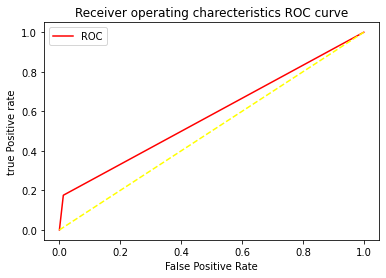

In [144]:
plt.plot(fpr,tpr,color='red',label='ROC')
plt.plot([0,1],[0,1],color='yellow',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('true Positive rate')
plt.title('Receiver operating charecteristics ROC curve')
plt.legend()
plt.show()

# AUC Score

In [145]:
auc_score=roc_auc_score(Y1_pred,Y_test)
auc_score

0.7907586763518968

# KNN classifiers

In [127]:
from sklearn.neighbors import KNeighborsClassifier

In [128]:
knn=KNeighborsClassifier()

In [129]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [131]:
Y2_pred=knn.predict(X_test)

In [132]:
acc_scr=accuracy_score(Y2_pred,Y_test)
acc_scr

0.8369565217391305

# Classificationreport

In [134]:
print(classification_report(Y2_pred,Y_test))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       351
           1       0.12      0.41      0.19        17

    accuracy                           0.84       368
   macro avg       0.55      0.63      0.55       368
weighted avg       0.93      0.84      0.88       368



In [135]:
con_mat=confusion_matrix(Y2_pred,Y_test)
con_mat

array([[301,  50],
       [ 10,   7]], dtype=int64)

# thresholds to find roc curve

In [146]:
fpr,tpr,thresholds=roc_curve(Y_test,Y2_pred) 
print('Threshold=',thresholds) 
print('true Positive Rate=',tpr) 
print('false positive Rate=',fpr)

Threshold= [2 1 0]
true Positive Rate= [0.         0.12280702 1.        ]
false positive Rate= [0.         0.03215434 1.        ]


# ROC curve

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'true Positive rate')

Text(0.5, 1.0, 'Receiver operating charecteristics ROC curve')

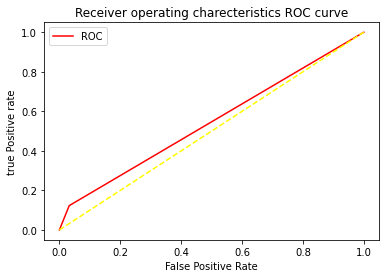

In [147]:
plt.plot(fpr,tpr,color='red',label='ROC')
plt.plot([0,1],[0,1],color='yellow',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('true Positive rate')
plt.title('Receiver operating charecteristics ROC curve')
plt.legend()
plt.show()

# AUC score

In [148]:
auc_score=roc_auc_score(Y2_pred,Y_test)
auc_score

0.6346572817161052

# DecisionTreeClassifier

In [150]:
from sklearn.tree import DecisionTreeClassifier

In [151]:
clf= DecisionTreeClassifier()
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [154]:
clf.score(X_train,Y_train)

1.0

In [155]:
Y3_pred=clf.predict(X_test)

In [156]:
acc_scr=accuracy_score(Y3_pred,Y_test)
acc_scr

0.8179347826086957

# HyperParameterTuning:

# GridSearchCV

In [178]:
#Tuning the parameters..
grid_para= {
    'criterion':['gini','entropy'],
    'max_depth':range(5,15),
    'min_samples_leaf':range(2,10),
    'min_samples_split':range(3,10),
    'max_leaf_nodes':range(2,4)
}

In [179]:
grid_search = GridSearchCV(estimator = clf,
                          param_grid=grid_para,
                           cv=5,
                          n_jobs=-1)

In [180]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 15),
                         'max_leaf_nodes': range(2, 4),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [181]:
#Finding the best combinations
best_param=grid_search.best_params_
print(best_param)

{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [182]:
clf=DecisionTreeClassifier(criterion='gini',max_leaf_nodes=5,min_samples_leaf=8,min_samples_split=4,max_depth=10)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=5, min_samples_leaf=8,
                       min_samples_split=4)

# Classificationreport

In [157]:
print(classification_report(Y_test,Y3_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       311
           1       0.40      0.37      0.39        57

    accuracy                           0.82       368
   macro avg       0.64      0.63      0.64       368
weighted avg       0.81      0.82      0.81       368



# Confusionmatrix

In [158]:
conf_mat=confusion_matrix(Y_test,Y3_pred)
conf_mat

array([[280,  31],
       [ 36,  21]], dtype=int64)

# thresholds

In [159]:
fpr,tpr,thresholds=roc_curve(Y_test,Y3_pred) 
print('Threshold=',thresholds) 
print('true Positive Rate=',tpr) 
print('false positive Rate=',fpr)

Threshold= [2 1 0]
true Positive Rate= [0.         0.36842105 1.        ]
false positive Rate= [0.         0.09967846 1.        ]


# ROC curve

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'true Positive rate')

Text(0.5, 1.0, 'Receiver operating charecteristics ROC curve')

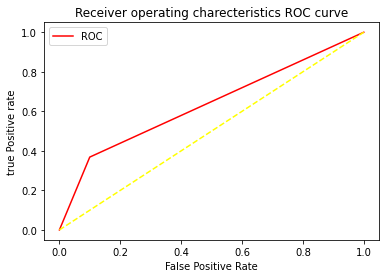

In [160]:
plt.plot(fpr,tpr,color='red',label='ROC')
plt.plot([0,1],[0,1],color='yellow',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('true Positive rate')
plt.title('Receiver operating charecteristics ROC curve')
plt.legend()
plt.show()

# AUC score

In [161]:
auc_score=roc_auc_score(Y3_pred,Y_test)
auc_score

0.6449610516066212

#  Concluding :

In [188]:
# Showing the results

print("Logistic Regression Classifier: {:.2f}% Accuracy".format( 100 * accuracy_score(Y_pred, Y_test)))
print("Random Forest Classifier: {:.2f}% Accuracy".format( 100 * accuracy_score(Y1_pred, Y_test)))
print("K-Nearest Neighbors Classifier: {:.2f}% Accuracy".format( 100 * accuracy_score(Y2_pred, Y_test)))
print("DecisionTreeClassifier: {:.2f}% Accuracy".format( 100 * accuracy_score(Y3_pred, Y_test)))

Logistic Regression Classifier: 90.49% Accuracy
Random Forest Classifier: 86.14% Accuracy
K-Nearest Neighbors Classifier: 83.70% Accuracy
DecisionTreeClassifier: 81.79% Accuracy


#                                               THANK YOU